In [1]:
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency,t
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from pandas import read_excel, DataFrame, merge, cut
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA   # 주성분 분석용 패키지
from matplotlib import pyplot as plt
from patsy import dmatrix
from scipy import stats
from math import sqrt
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지

import statsmodels.api as sm
import seaborn as sb
import numpy as np
import helper
import sys
import os

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df=read_excel("세미프로젝트3_2.xlsx")
df

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자,기초연금,공적연금,재난지원금
0,275,0.0,0,7.0,0.0,500,360.0,0.0,10000,0.0,0,350.0,0,0,25
1,239,0.0,0,7.0,0.0,380,10.0,0.0,0,0.0,0,0.0,360,0,20
2,156,0.0,80,7.0,0.0,0,285.0,0.0,14000,20500.0,720,0.0,360,540,20
3,541,140.0,0,9.0,0.0,0,20.0,0.0,0,0.0,0,0.0,576,0,125
4,85,50.0,0,7.0,0.0,420,3.0,0.0,0,0.0,0,0.0,360,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,384,0.0,0,1.0,50.0,0,0.0,70.0,3000,3000.0,96,0.0,0,0,100
7861,715,0.0,660,1.0,40.0,0,0.0,90.0,40000,0.0,0,1560.0,0,0,100
7862,595,0.0,4000,1.0,40.0,0,0.0,0.0,25947,25947.0,67,0.0,0,0,120
7863,562,40.0,0,0.0,0.0,0,0.0,0.0,12000,12000.0,360,0.0,0,0,30


In [4]:
df1=df.copy()
helper.prettyPrint(df1.dtypes, title='데이터 타입')
print("="*40)
helper.prettyPrint(df1.isna().sum(), title='결측치')
df1.fillna(value=0, inplace=True)
print("="*40)
helper.prettyPrint(df1.isna().sum(), title='결측치')

+----------------------+---------------+
|                      | 데이터 타입   |
|----------------------+---------------|
| 총생활비             | int64         |
| 이자_배당금_연간소득 | float64       |
| 임대료_연간소득      | int64         |
| 기타_소득            | float64       |
| 부모가보낸생활비     | float64       |
| 자녀가보낸생활비     | int64         |
| 민간보조금           | float64       |
| 세금환급금           | float64       |
| 금융기관대출         | int64         |
| 주택관련_부채액      | float64       |
| 주거관련_부채의_이자 | int64         |
| 기타이자             | float64       |
| 기초연금             | int64         |
| 공적연금             | int64         |
| 재난지원금           | int64         |
+----------------------+---------------+
+----------------------+----------+
|                      |   결측치 |
|----------------------+----------|
| 총생활비             |        0 |
| 이자_배당금_연간소득 |        0 |
| 임대료_연간소득      |        0 |
| 기타_소득            |        0 |
| 부모가보낸생활비     |        0 |
| 자녀가보낸생활비     |        0 |
| 민간보조금           |        0 |
| 세

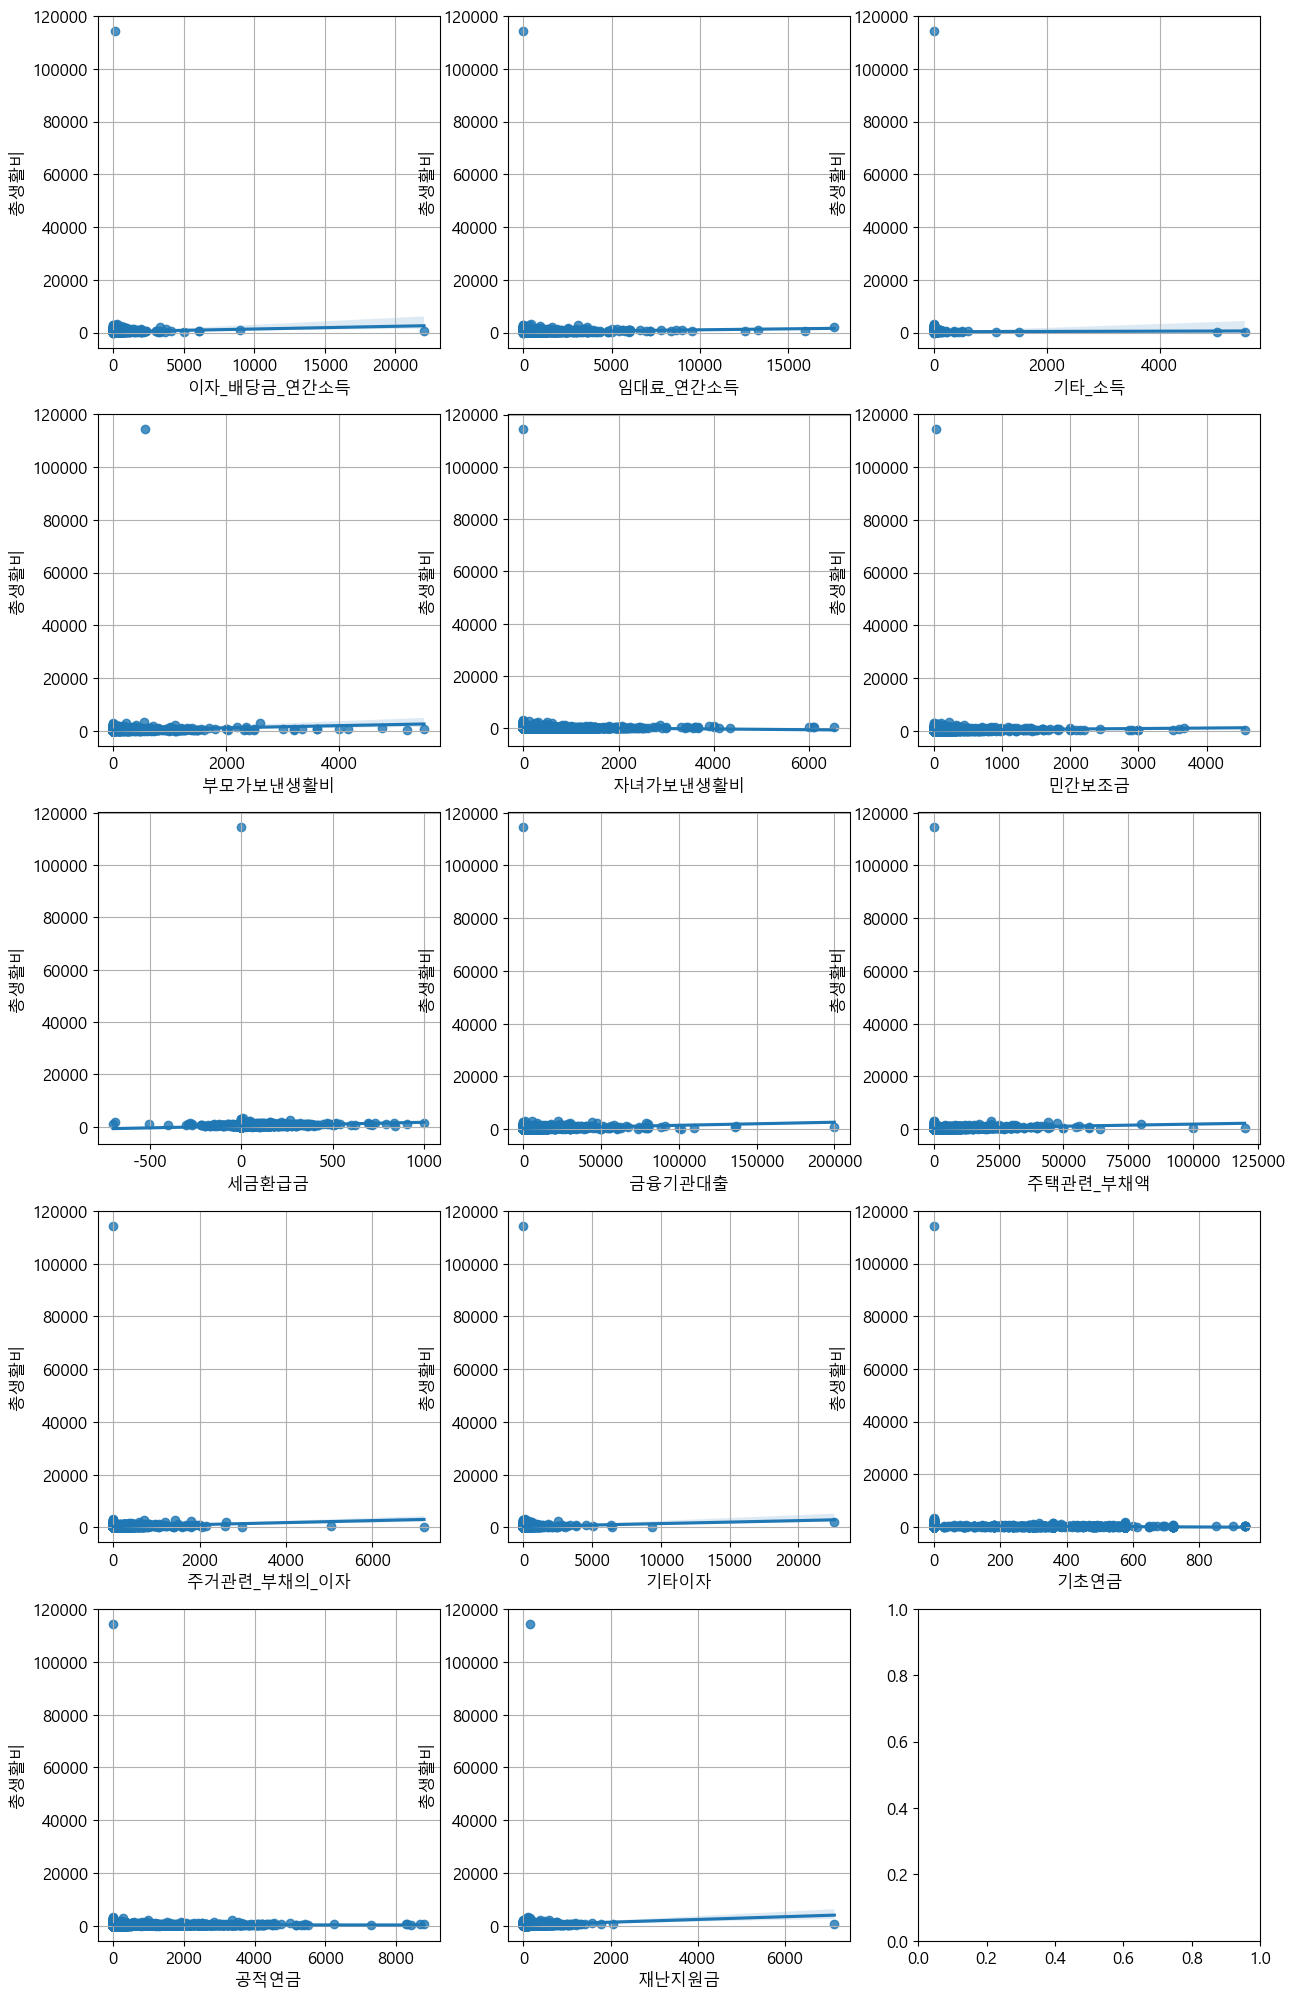

In [5]:
columns = list(df1.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=df1, x=c, y=dependent_variable, ax=ax[row, col])
    ax[row, col].set_xlabel(c)
    ax[row, col].set_ylabel(dependent_variable)
    ax[row, col].grid(True) 

plt.show()
plt.close()

In [6]:
df2=df1.query(
    '(총생활비 < 100000) and (이자_배당금_연간소득 < 20000) and \
        (기타_소득 < 4900) and (금융기관대출 < 190000) and (재난지원금 < 7000)'
) 

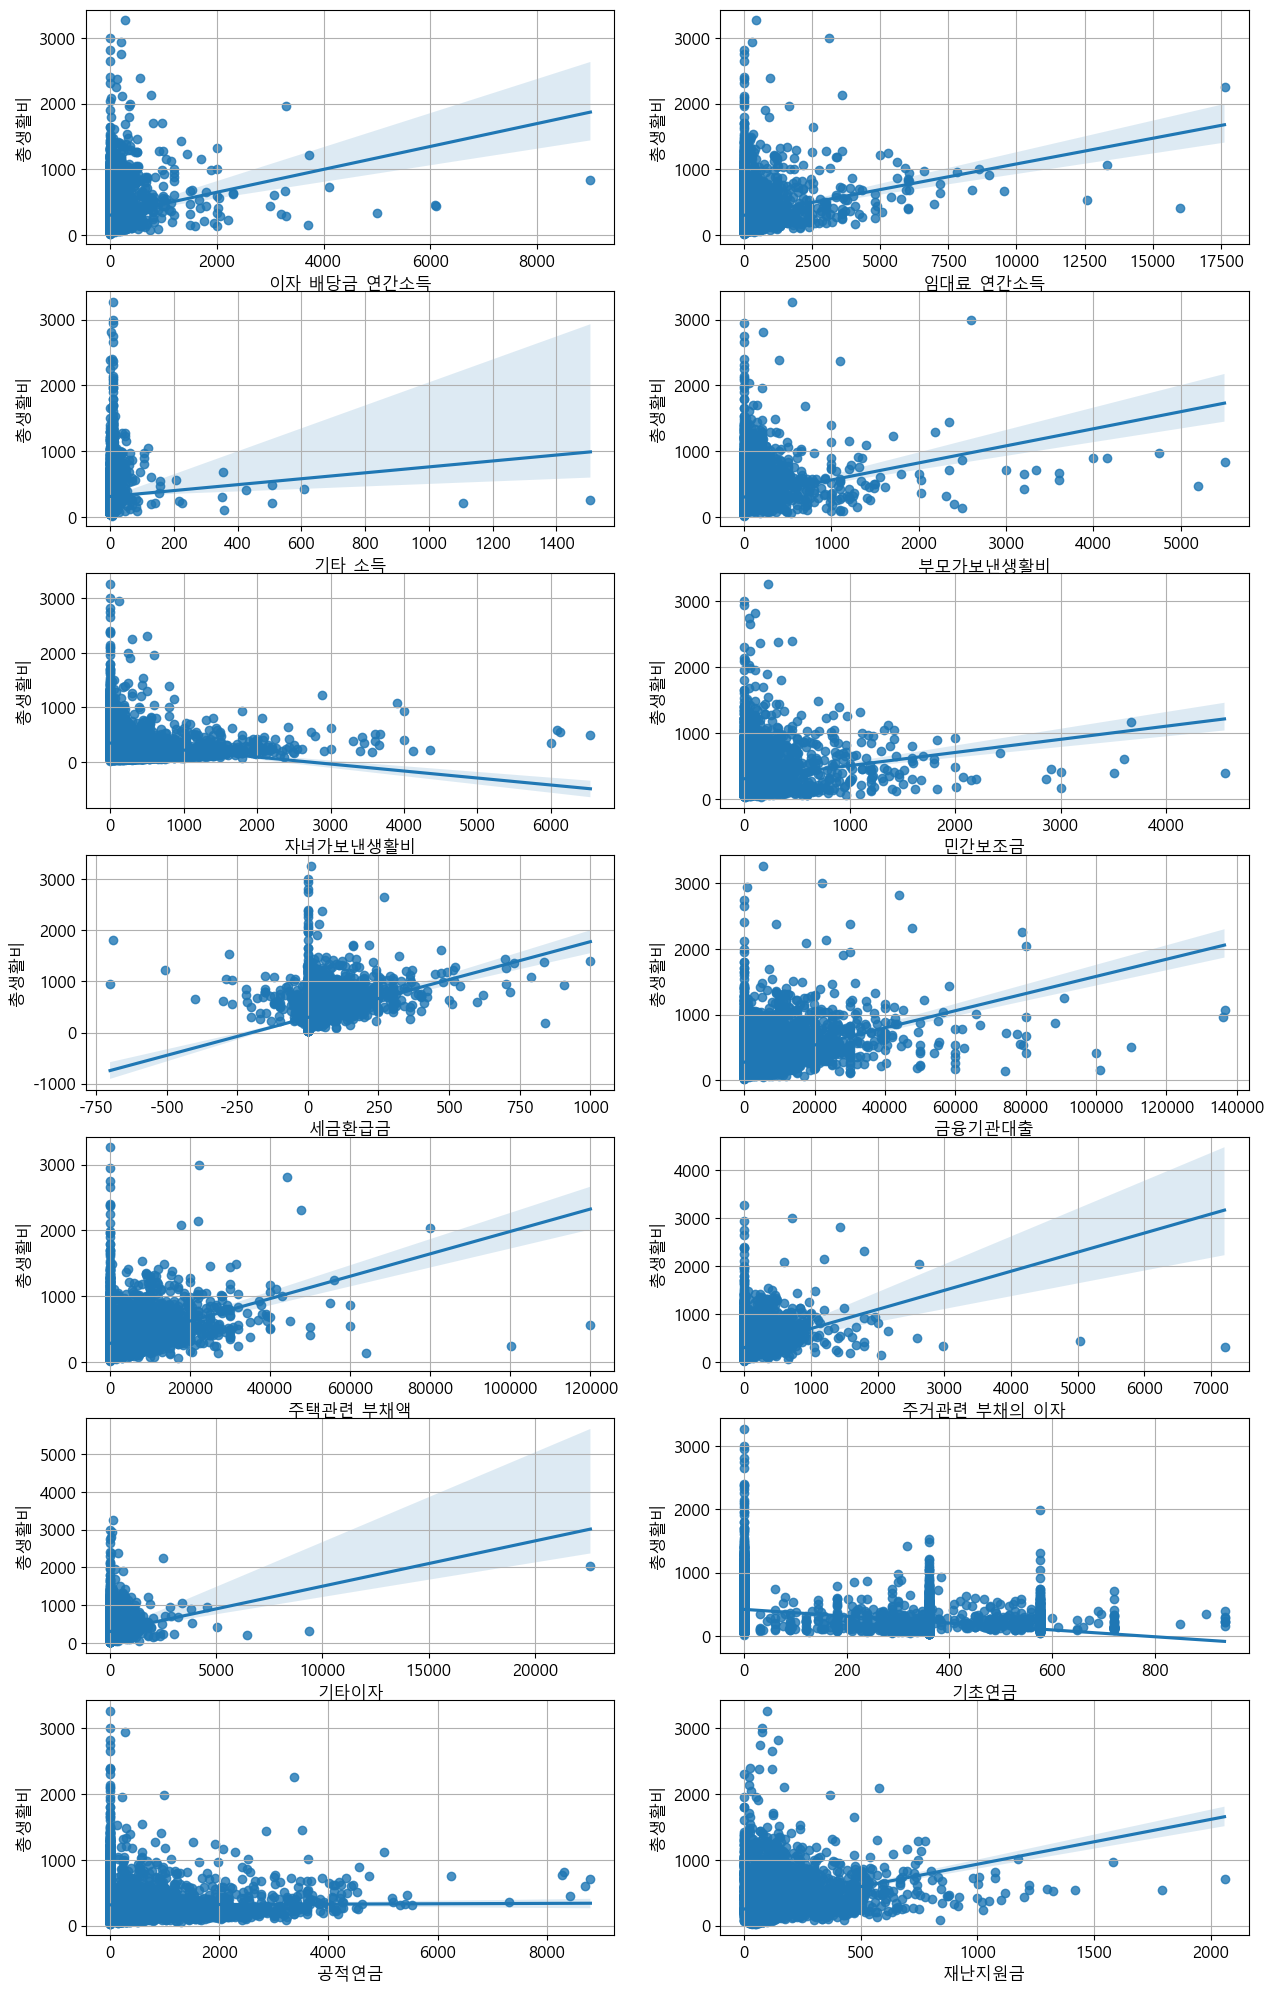

In [7]:
columns = list(df2.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 2)
    sb.regplot(data=df2, x=c, y=dependent_variable, ax=ax[row, col])
    ax[row, col].set_xlabel(c)
    ax[row, col].set_ylabel(dependent_variable)
    ax[row, col].grid(True) 

plt.show()
plt.close()

In [8]:
scaler = StandardScaler()
df2_std = df2.copy()

df2_std['총생활비'] = scaler.fit_transform(df2_std[['총생활비']])
df2_std['이자_배당금_연간소득'] = scaler.fit_transform(df2_std[['이자_배당금_연간소득']])
df2_std['임대료_연간소득'] = scaler.fit_transform(df2_std[['임대료_연간소득']])
df2_std['기타_소득'] = scaler.fit_transform(df2_std[['기타_소득']])
df2_std['세금환급금'] = scaler.fit_transform(df2_std[['세금환급금']])
df2_std['부모가보낸생활비'] = scaler.fit_transform(df2_std[['부모가보낸생활비']])
df2_std['자녀가보낸생활비'] = scaler.fit_transform(df2_std[['자녀가보낸생활비']])
df2_std['민간보조금'] = scaler.fit_transform(df2_std[['민간보조금']])
df2_std['금융기관대출'] = scaler.fit_transform(df2_std[['금융기관대출']])
df2_std['주택관련_부채액'] = scaler.fit_transform(df2_std[['주택관련_부채액']])
df2_std['주거관련_부채의_이자'] = scaler.fit_transform(df2_std[['주거관련_부채의_이자']])
df2_std['기타이자'] = scaler.fit_transform(df2_std[['기타이자']])
df2_std['기초연금'] = scaler.fit_transform(df2_std[['기초연금']])
df2_std['공적연금'] = scaler.fit_transform(df2_std[['공적연금']])
df2_std['재난지원금'] = scaler.fit_transform(df2_std[['재난지원금']])
df2_std

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자,기초연금,공적연금,재난지원금
0,-0.148503,-0.215825,-0.200522,-0.004582,-0.209725,0.653613,1.488536,-0.242354,0.888392,-0.320955,-0.272759,0.861872,-0.880946,-0.427626,-0.580214
1,-0.281743,-0.215825,-0.200522,-0.004582,-0.209725,0.362327,-0.237737,-0.242354,-0.367689,-0.320955,-0.272759,-0.133894,0.757655,-0.427626,-0.622254
2,-0.588933,-0.215825,-0.076379,-0.004582,-0.209725,-0.560079,1.118621,-0.242354,1.390825,3.401969,3.415518,-0.133894,0.757655,0.372241,-0.622254
3,0.835987,0.357141,-0.200522,0.071568,-0.209725,-0.560079,-0.188415,-0.242354,-0.367689,-0.320955,-0.272759,-0.133894,1.740816,-0.427626,0.260578
4,-0.851711,-0.011194,-0.200522,-0.004582,-0.209725,0.459423,-0.272263,-0.242354,-0.367689,-0.320955,-0.272759,-0.133894,0.757655,-0.427626,-0.496135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,0.254916,-0.215825,-0.200522,-0.233032,0.018732,-0.560079,-0.287059,0.927333,0.009135,0.223863,0.219011,-0.133894,-0.880946,-0.427626,0.050380
7861,1.479977,-0.215825,0.823652,-0.233032,-0.026959,-0.560079,-0.287059,1.261529,4.656635,-0.320955,-0.272759,4.304376,-0.880946,-0.427626,0.050380
7862,1.035846,-0.215825,6.006591,-0.233032,-0.026959,-0.560079,-0.287059,-0.242354,2.891465,4.391177,0.070455,-0.133894,-0.880946,-0.427626,0.218539
7863,0.913710,-0.052121,-0.200522,-0.271107,-0.209725,-0.560079,-0.287059,-0.242354,1.139608,1.858317,1.571379,-0.133894,-0.880946,-0.427626,-0.538174


In [9]:
df2_std_removed = df2_std.drop('총생활비',axis=1)
df2_std_removed

,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자,기초연금,공적연금,재난지원금
0,-0.215825,-0.200522,-0.004582,-0.209725,0.653613,1.488536,-0.242354,0.888392,-0.320955,-0.272759,0.861872,-0.880946,-0.427626,-0.580214
1,-0.215825,-0.200522,-0.004582,-0.209725,0.362327,-0.237737,-0.242354,-0.367689,-0.320955,-0.272759,-0.133894,0.757655,-0.427626,-0.622254
2,-0.215825,-0.076379,-0.004582,-0.209725,-0.560079,1.118621,-0.242354,1.390825,3.401969,3.415518,-0.133894,0.757655,0.372241,-0.622254
3,0.357141,-0.200522,0.071568,-0.209725,-0.560079,-0.188415,-0.242354,-0.367689,-0.320955,-0.272759,-0.133894,1.740816,-0.427626,0.260578
4,-0.011194,-0.200522,-0.004582,-0.209725,0.459423,-0.272263,-0.242354,-0.367689,-0.320955,-0.272759,-0.133894,0.757655,-0.427626,-0.496135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,-0.215825,-0.200522,-0.233032,0.018732,-0.560079,-0.287059,0.927333,0.009135,0.223863,0.219011,-0.133894,-0.880946,-0.427626,0.050380
7861,-0.215825,0.823652,-0.233032,-0.026959,-0.560079,-0.287059,1.261529,4.656635,-0.320955,-0.272759,4.304376,-0.880946,-0.427626,0.050380
7862,-0.215825,6.006591,-0.233032,-0.026959,-0.560079,-0.287059,-0.242354,2.891465,4.391177,0.070455,-0.133894,-0.880946,-0.427626,0.218539
7863,-0.052121,-0.200522,-0.271107,-0.209725,-0.560079,-0.287059,-0.242354,1.139608,1.858317,1.571379,-0.133894,-0.880946,-0.427626,-0.538174


In [10]:
# sb.pairplot(df2_std_removed)
# plt.show()
# plt.close()

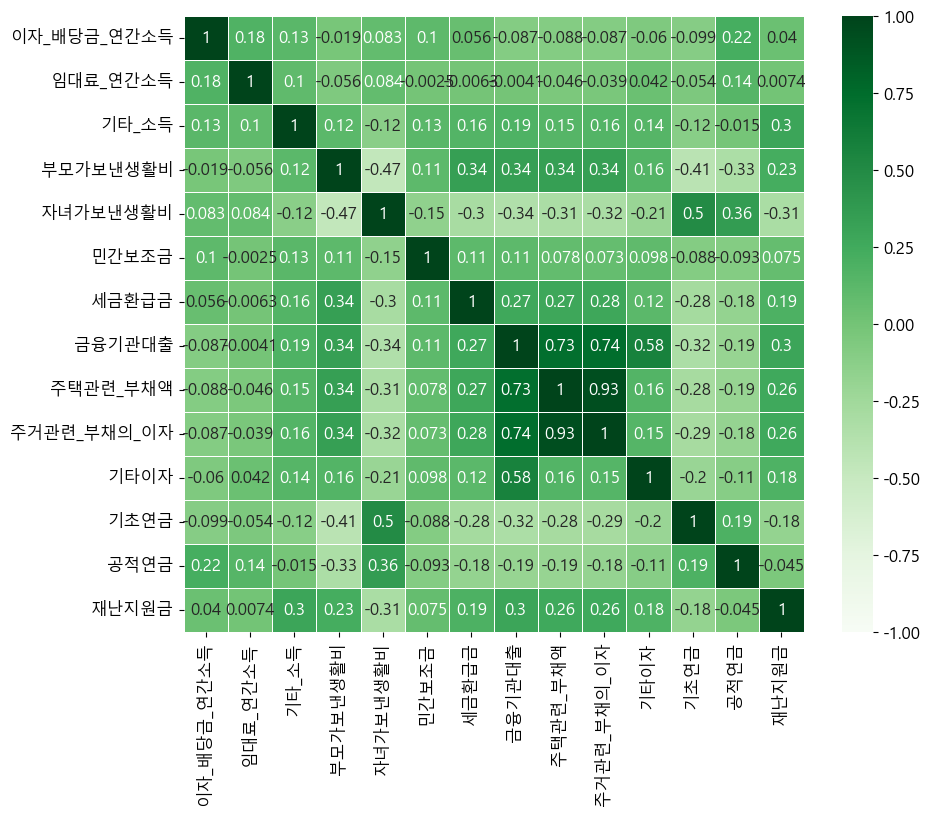

In [15]:
plt.rcParams["figure.figsize"] = (10,8)
sb.heatmap(df2_std_removed.corr(method='spearman'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

In [16]:
# 바로 회귀분석 진행

names =['이자_배당금_연간소득','임대료_연간소득','기타_소득','부모가보낸생활비','자녀가보낸생활비','민간보조금','세금환급금','금융기관대출','주택관련_부채액','주거관련_부채의_이자','기타이자','기초연금','공적연금','재난지원금']
result = helper.myOls(df2_std, x=names, y="총생활비")
result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총생활비   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     369.5
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:10   Log-Likelihood:                -9161.3
No. Observations:                7859   AIC:                         1.835e+04
Df Residuals:                    7844   BIC:                         1.846e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     9.14e-17      0.009   1.04e-14      1.000      -0.017       0.017
이자_배당금_연간소득     0.0917      0.009     10.333      0.000       0.074       0.109
임대료_연간소득        0.0957      0.009     10.359      0.000       0.078       0.114
기타_소득           0.0133      0.009      1.517      0.129      -0.004       0.031
부모가보낸생활비        0.0927      0.009     10.269      0.000       0.075       0.110
자녀가보낸생활비       -0.0255      0.009     -2.744      0.006      -0.044      -0.007
민간보조금           0.0856      0.009      9.682      0.000       0.068       0.103
세금환급금           0.2052      0.009     22.515      0.000       0.187       0.223
금융기관대출          0.1322      0.014      9.705      0.000       0.105       0.159
주택관련_부채액        0.0980      0.015      6.676      0.000       0.069       0.127
주거관련_부채의_이자     0.0006      0.013      0.050      0.960      -0.025       0.026
기타이자            0.0277      0.010      2.755      0.006       0.008       0.047
기초연금           -0.2649      0.010    -27.099      0.000      -0.284      -0.246
공적연금            0.0170      0.009      1.888      0.059      -0.001       0.035
재난지원금           0.1813      0.009     19.978      0.000       0.164       0.199
==============================================================================
Omnibus:                     5457.775   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171524.702
Skew:                           2.917   Prob(JB):                         0.00
Kurtosis:                      25.131   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
result.table

B   표준오차  β         t   유의확률       VIF
종속변수 독립변수                                                     
총생활비 이자_배당금_연간소득   0.0917  0.009  0   10.333*  0.000  1.039311
     임대료_연간소득      0.0957  0.009  0   10.359*  0.000  1.126988
     기타_소득         0.0133  0.009  0    1.517*  0.129  1.004868
     부모가보낸생활비      0.0927  0.009  0   10.269*  0.000  1.073977
     자녀가보낸생활비     -0.0255  0.009  0   -2.744*  0.006  1.127484
     민간보조금         0.0856  0.009  0    9.682*  0.000  1.028938
     세금환급금         0.2052  0.009  0   22.515*  0.000  1.151232
     금융기관대출        0.1322  0.014  0    9.705*  0.000  2.443039
     주택관련_부채액      0.0980  0.015  0    6.676*  0.000  2.822194
     주거관련_부채의_이자   0.0006  0.013  0    0.050*  0.960  2.156512
     기타이자          0.0277  0.010  0    2.755*  0.006  1.317100
     기초연금         -0.2649  0.010  0  -27.099*  0.000  1.360728
     공적연금          0.0170  0.009  0    1.888*  0.059  1.050176
     재난지원금         0.1813  0.009  0   19.978*  0.000  1.126949

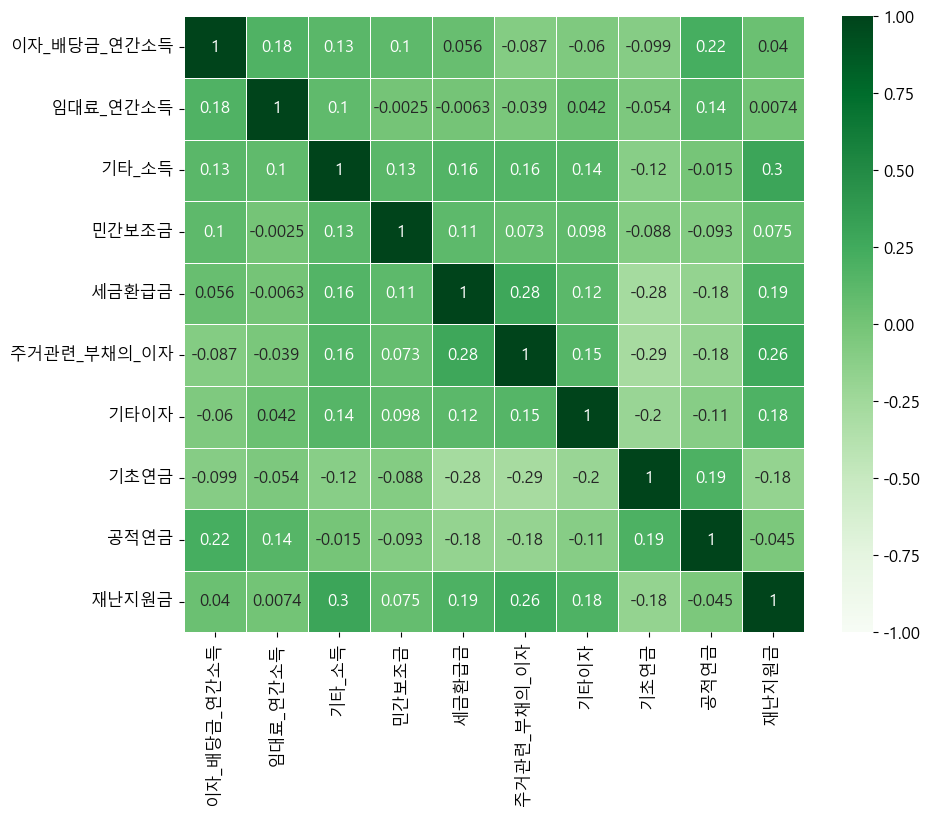

In [18]:
plt.rcParams["figure.figsize"] = (10,8)
df2_std_removed2 = df2_std_removed.drop(['금융기관대출'],axis = 1)
df2_std_removed3 = df2_std_removed2.drop(['주택관련_부채액'],axis = 1)
df2_std_removed4 = df2_std_removed3.drop(['부모가보낸생활비'],axis = 1)
df2_std_removed5 = df2_std_removed4.drop(['자녀가보낸생활비'],axis = 1)
# df2_std_removed4 = df2_std_removed3.drop(['부모로부터의_보조금'],axis = 1)
sb.heatmap(df2_std_removed5.corr(method='spearman'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

In [ ]:
df2_std_removed5.corr(method='spearman')

,이자_배당금_연간소득,임대료_연간소득,기타_소득,민간보조금,세금환급금,주거관련_부채의_이자,기타이자,기초연금,공적연금,재난지원금
이자_배당금_연간소득,1.000000,0.175856,0.131413,0.103612,0.055806,-0.086860,-0.060146,-0.098978,0.224988,0.039586
임대료_연간소득,0.175856,1.000000,0.099732,-0.002538,-0.006265,-0.038910,0.041747,-0.053979,0.143308,0.007447
기타_소득,0.131413,0.099732,1.000000,0.131055,0.158226,0.156689,0.141256,-0.116063,-0.014850,0.295934
민간보조금,0.103612,-0.002538,0.131055,1.000000,0.110892,0.072768,0.097770,-0.088297,-0.092589,0.075050
세금환급금,0.055806,-0.006265,0.158226,0.110892,1.000000,0.276158,0.118376,-0.278614,-0.176233,0.190079
주거관련_부채의_이자,-0.086860,-0.038910,0.156689,0.072768,0.276158,1.000000,0.153365,-0.286975,-0.184391,0.264649
기타이자,-0.060146,0.041747,0.141256,0.097770,0.118376,0.153365,1.000000,-0.203579,-0.106540,0.184624
기초연금,-0.098978,-0.053979,-0.116063,-0.088297,-0.278614,-0.286975,-0.203579,1.000000,0.193484,-0.177483
공적연금,0.224988,0.143308,-0.014850,-0.092589,-0.176233,-0.184391,-0.106540,0.193484,1.000000,-0.045009
재난지원금,0.039586,0.007447,0.295934,0.075050,0.190079,0.264649,0.184624,-0.177483,-0.045009,1.000000


In [ ]:
spearman_r(df2_std_removed5)

+-----------------------------------------+-------------+--------------+----------+
| fields                                  |   statistic |       pvalue | result   |
|-----------------------------------------+-------------+--------------+----------|
| 이자_배당금_연간소득 vs 임대료_연간소득 |    0.175856 |  1.29281e-55 | True     |
| 임대료_연간소득 vs 기타_소득            |   0.0997323 |  7.85451e-19 | True     |
| 기타_소득 vs 민간보조금                 |    0.131055 |  1.88789e-31 | True     |
| 민간보조금 vs 세금환급금                |    0.110892 |  6.23443e-23 | True     |
| 세금환급금 vs 주거관련_부채의_이자      |    0.276158 | 1.47327e-137 | True     |
| 주거관련_부채의_이자 vs 기타이자        |    0.153365 |  1.43716e-42 | True     |
| 기타이자 vs 기초연금                    |   -0.203579 |  2.67769e-74 | True     |
| 기초연금 vs 공적연금                    |    0.193484 |  3.71118e-67 | True     |
| 공적연금 vs 재난지원금                  |  -0.0450092 |  6.56581e-05 | True     |
| 재난지원금 vs 이자_배당금_연간소득      |   0.0395859 |  0.000447855 | True     |
+-------------------

In [ ]:
df2_std_removed5_names =['이자_배당금_연간소득','임대료_연간소득','기타_소득','민간보조금','세금환급금','주거관련_부채의_이자','기타이자','기초연금','공적연금','재난지원금']
result = myOls(df2_std, x=df2_std_removed5_names, y="총생활비")
result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총생활비   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     453.2
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:25:26   Log-Likelihood:                -9360.3
No. Observations:                7859   AIC:                         1.874e+04
Df Residuals:                    7848   BIC:                         1.882e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.176e-16      0.009  -6.87e-14      1.000      -0.018       0.018
이자_배당금_연간소득     0.0934      0.009     10.265      0.000       0.076       0.111
임대료_연간소득        0.1157      0.009     12.581      0.000       0.098       0.134
기타_소득           0.0155      0.009      1.716      0.086      -0.002       0.033
민간보조금           0.0925      0.009     10.219      0.000       0.075       0.110
세금환급금           0.2285      0.009     24.660      0.000       0.210       0.247
주거관련_부채의_이자     0.1326      0.010     13.711      0.000       0.114       0.152
기타이자            0.0601      0.009      6.369      0.000       0.042       0.079
기초연금           -0.3043      0.010    -32.002      0.000      -0.323      -0.286
공적연금            0.0009      0.009      0.096      0.924      -0.017       0.019
재난지원금           0.1979      0.009     21.428      0.000       0.180       0.216
==============================================================================
Omnibus:                     5367.031   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179983.985
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      25.756   Cond. No.                         1.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = pca()
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(df2_std_removed)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,금융기관대출,0.491171,best
1,PC2,자녀가보낸생활비,0.497598,best
2,PC3,공적연금,0.567770,best
3,PC4,기타_소득,0.758736,best
4,PC5,세금환급금,-0.454537,best
5,PC6,민간보조금,-0.635869,best
6,PC7,재난지원금,-0.509041,best
7,PC8,공적연금,-0.540182,best
8,PC9,부모가보낸생활비,0.771742,best
9,PC10,이자_배당금_연간소득,0.454611,best


In [ ]:
df2_std_removed_names_pca=['금융기관대출','자녀가보낸생활비','임대료_연간소득','기타_소득','이자_배당금_연간소득','민간보조금','부모가보낸생활비','세금환급금','기타이자','기초연금','재난지원금']
model1 = myOls(df2_std, y="총생활비", x=df2_std_removed_names_pca)
model1.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총생활비   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     460.3
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:25:41   Log-Likelihood:                -9194.9
No. Observations:                7859   AIC:                         1.841e+04
Df Residuals:                    7847   BIC:                         1.850e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.176e-16      0.009  -7.02e-14      1.000      -0.017       0.017
금융기관대출          0.2017      0.010     19.312      0.000       0.181       0.222
자녀가보낸생활비       -0.0248      0.009     -2.662      0.008      -0.043      -0.007
임대료_연간소득        0.0864      0.009      9.446      0.000       0.068       0.104
기타_소득           0.0153      0.009      1.734      0.083      -0.002       0.033
이자_배당금_연간소득     0.0910      0.009     10.236      0.000       0.074       0.108
민간보조금           0.0856      0.009      9.653      0.000       0.068       0.103
부모가보낸생활비        0.0958      0.009     10.614      0.000       0.078       0.113
세금환급금           0.2101      0.009     23.104      0.000       0.192       0.228
기타이자            0.0145      0.010      1.477      0.140      -0.005       0.034
기초연금           -0.2735      0.010    -28.191      0.000      -0.292      -0.254
재난지원금           0.1826      0.009     20.112      0.000       0.165       0.200
==============================================================================
Omnibus:                     5428.328   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170000.746
Skew:                           2.894   Prob(JB):                         0.00
Kurtosis:                      25.038   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1.table

B   표준오차  β         t   유의확률       VIF
종속변수 독립변수                                                     
총생활비 금융기관대출        0.2017  0.010  0   19.312*  0.000  2.443039
     자녀가보낸생활비     -0.0248  0.009  0   -2.662*  0.008  1.127484
     임대료_연간소득      0.0864  0.009  0    9.446*  0.000  1.126988
     기타_소득         0.0153  0.009  0    1.734*  0.083  1.004868
     이자_배당금_연간소득   0.0910  0.009  0   10.236*  0.000  1.039311
     민간보조금         0.0856  0.009  0    9.653*  0.000  1.028938
     부모가보낸생활비      0.0958  0.009  0   10.614*  0.000  1.073977
     세금환급금         0.2101  0.009  0   23.104*  0.000  1.151232
     기타이자          0.0145  0.010  0    1.477*  0.140  1.317100
     기초연금         -0.2735  0.010  0  -28.191*  0.000  1.360728
     재난지원금         0.1826  0.009  0   20.112*  0.000  1.126949

In [ ]:
model1.goodness

'총생활비에 대하여 금융기관대출,자녀가보낸생활비,임대료_연간소득,기타_소득,이자_배당금_연간소득,민간보조금,부모가보낸생활비,세금환급금,기타이자,기초연금,재난지원금로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(11,7847) = 460.3, p < 0.05).'

In [ ]:
model1.varstr

['금융기관대출의 회귀계수는 0.2017(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '자녀가보낸생활비의 회귀계수는 -0.0248(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '임대료_연간소득의 회귀계수는 0.0864(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '기타_소득의 회귀계수는 0.0153(p>0.05)로, 총생활비에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 '이자_배당금_연간소득의 회귀계수는 0.0910(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '민간보조금의 회귀계수는 0.0856(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '부모가보낸생활비의 회귀계수는 0.0958(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '세금환급금의 회귀계수는 0.2101(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '기타이자의 회귀계수는 0.0145(p>0.05)로, 총생활비에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 '기초연금의 회귀계수는 -0.2735(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.',
 '재난지원금의 회귀계수는 0.1826(p<0.05)로, 총생활비에 대하여 유의미한 예측변인인 것으로 나타났다.']